In [3]:
# First let's see what kind of results we can generate without a grid search using only the base parameters.

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logistic =  LogisticRegression(max_iter=10000)

print(logistic.fit(X, y))
print(logistic.score(X, y))

# With the default setting of C = 1, we achieved a score of 0.973.

# Let's see if we can do any better by implementing a grid search with difference values of 0.973.

LogisticRegression(max_iter=10000)
0.9733333333333334


In [9]:
# implementing grid search

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

x = iris['data']
y = iris['target']

logistic = LogisticRegression(max_iter = 10000)

c = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in c:
  logistic.set_params(C =choice)
  logistic.fit(x, y)
  scores.append(logistic.score(x, y),)

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


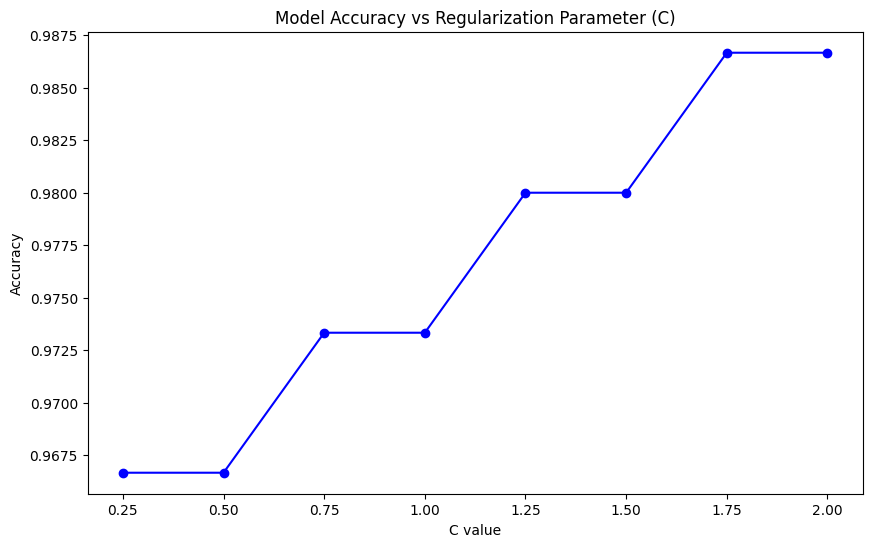

In [18]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter=10000)

C_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C_values:
    logit.set_params(C = choice)
    logit.fit(X, y)
    scores.append(logit.score(X, y))

plt.figure(figsize = (10, 6))
plt.plot(C_values, scores, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs Regularization Parameter (C)')
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.xticks(C_values)
plt.show()

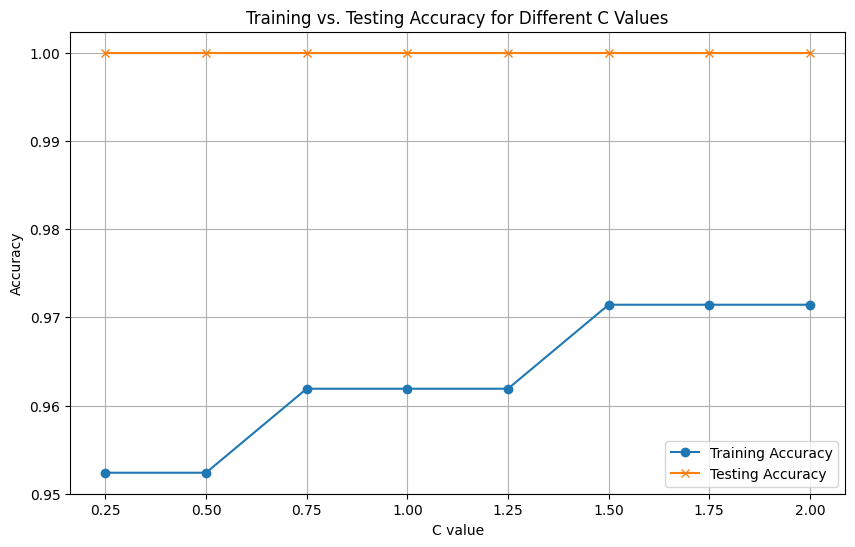

In [19]:

# -Train-Test Split with Accuracy Visualization


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the range of C values
C_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

# Initialize lists to store train and test accuracies
train_scores = []
test_scores = []

# Train and evaluate model for each C value
for C in C_values:
    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Plotting Training and Testing Accuracy for each C
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Training Accuracy', marker='o')
plt.plot(C_values, test_scores, label='Testing Accuracy', marker='x')
plt.title("Training vs. Testing Accuracy for Different C Values")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.xticks(C_values)
plt.show()

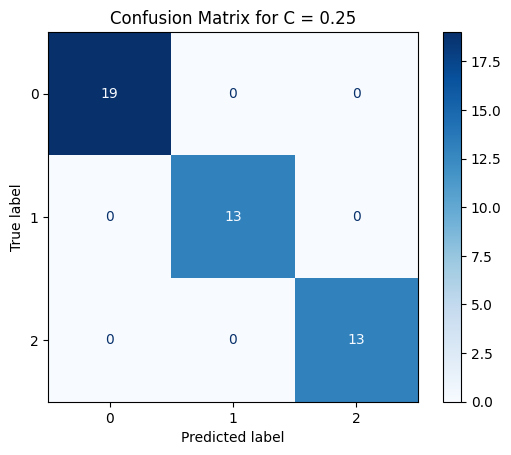

In [20]:
# Identifying the best C value based on test accuracy
best_C = C_values[np.argmax(test_scores)]
best_model = LogisticRegression(C=best_C, max_iter=10000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion Matrix for the best C value
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for C = {best_C}")
plt.show()

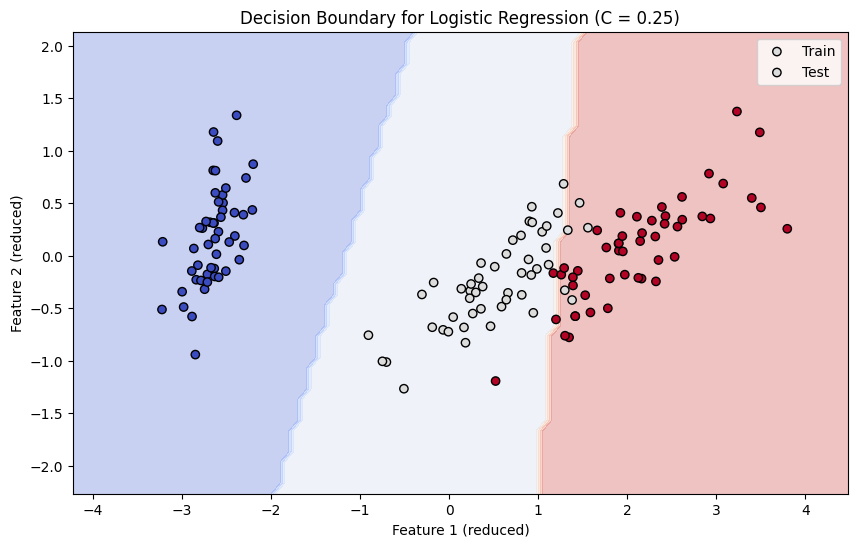

In [22]:
# Decision Boundary Visualization (for 2-feature, binary classification)
from sklearn.decomposition import PCA

# Reduce to two features for visualization
X_reduced = PCA(n_components=2).fit_transform(X)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train model on reduced features with optimal C
best_model.fit(X_train_red, y_train_red)

# Plot decision boundary
x_min, x_max = X_train_red[:, 0].min() - 1, X_train_red[:, 0].max() + 1
y_min, y_max = X_train_red[:, 1].min() - 1, X_train_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], c=y_train_red, edgecolor='k', marker='o', cmap=plt.cm.coolwarm, label="Train")
plt.scatter(X_test_red[:, 0], X_test_red[:, 1], c=y_test_red, edgecolor='k', cmap=plt.cm.coolwarm, label="Test")
plt.title(f"Decision Boundary for Logistic Regression (C = {best_C})")
plt.xlabel("Feature 1 (reduced)")
plt.ylabel("Feature 2 (reduced)")
plt.legend()
plt.show()

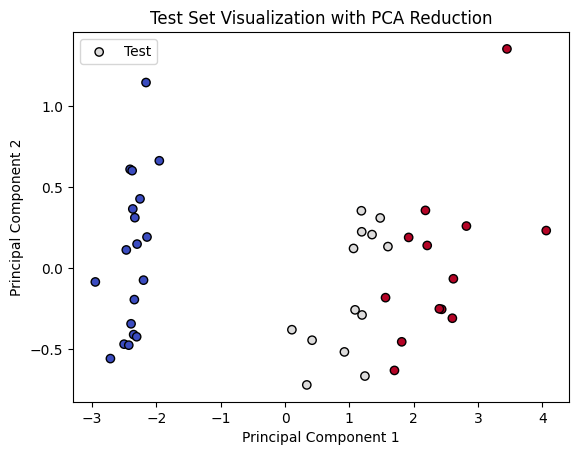

In [24]:
#-Scatter Plot with PCA (Principal Component Analysis)-

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Load the data
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA to reduce to 2 features for visualization
pca = PCA(n_components=2)
X_test_red = pca.fit_transform(X_test)
y_test_red = y_test  # Optional for clarity, but same as y_test

# Train the model
from sklearn.linear_model import LogisticRegression
best_model = LogisticRegression(C=1.5, max_iter=10000)
best_model.fit(X_train, y_train)

# Plot decision boundaries (using reduced dimensions)
plt.scatter(X_test_red[:, 0], X_test_red[:, 1], c=y_test_red, edgecolor='k', marker='o', cmap=plt.cm.coolwarm, label="Test")
plt.title("Test Set Visualization with PCA Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

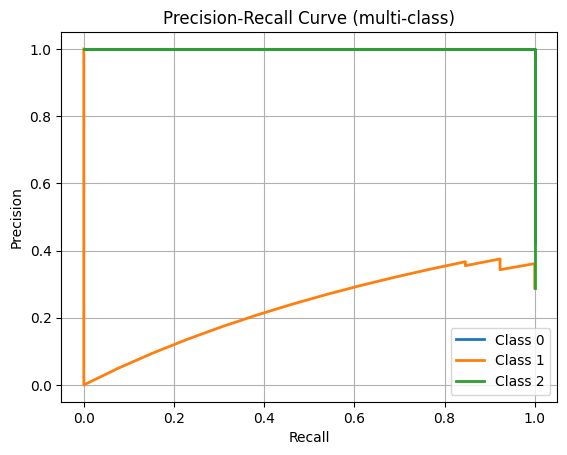

In [25]:
# -Receiver Operating Characteristic (ROC) Curve-



# For decision_function, keep X_test with original dimensions
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = best_model.decision_function(X_test)

# Plot Precision-Recall or ROC based on binary or multi-class classification
if y_test_bin.shape[1] == 2:  # Binary classification
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    plt.plot(fpr, tpr, label="ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="best")
else:  # Multi-class
    for i in range(y_test_bin.shape[1]):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve (multi-class)")
    plt.legend(loc="best")

plt.grid()
plt.show()